# Data Cleaning
---

### Importing
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pysal.lib.io
import os
import time

/anaconda3/lib/python3.6/site-packages/pysal/lib/weights/util.py:19: UserWarning: geopandas not available. Some functionality will be disabled.
  warn('geopandas not available. Some functionality will be disabled.')
/anaconda3/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
raw = pd.read_csv("../data/Tax_Parcels.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Files over 100MB cannot be uploaded to GitHub, so the 
# Tax Parcels data will have to be trimmed down slightly.

print(os.path.getsize("../data/Tax_Parcels.csv") / 1_000_000, "MB")

150.901018 MB


In [4]:
# Open the volcanic hazards shape file

hazard = pysal.lib.io.open("../data/Volcanic_Hazards/Volcanic_Hazards.shp")

hazard

In [5]:
raw.shape

(327319, 35)

In [6]:
raw.head()

,OBJECTID,TaxParcelNumber,TaxParcelType,TaxParcelLevel,TaxParcelUnit,TaxParcelUnitType,EffectiveDate,RetiredDate,TaxParcelMultiPartCount,SubtypeCD,...,Legal_Description,Exemption_Code,RTSQQ,X_Coordinate,Y_Coordinate,Longitude,Latitude,MapLegend,Shape__Area,Shape__Length
0,3001,21247005,Base Parcel,0.0,,,NaN,NaN,1.0,0,...,Section 24 Township 21 Range 00 Quarter 34 ...,EXR,212434,1.081288e+06,721057.9755,-122.75325,47.28867,Base Parcel,38758.018311,1141.837123
1,3002,21247006,Base Parcel,0.0,,NaN,2014-10-29T00:00:00.000Z,NaN,1.0,0,...,Section 24 Township 21 Range 00 Quarter 33 ...,NaN,212433,1.080163e+06,720458.5894,-122.75771,47.28694,Base Parcel,345604.122986,3638.028072
2,3003,21247007,Base Parcel,0.0,,,2014-10-29T00:00:00.000Z,NaN,1.0,0,...,Section 24 Township 21 Range 00 Quarter 33 ...,NaN,212433,1.081042e+06,720375.4829,-122.75416,47.28678,Base Parcel,133528.313354,2089.154656
3,3004,21247700,Base Parcel,0.0,,,NaN,NaN,1.0,0,...,Section 24 Township 21 Range 00 Quarter 33 : 2...,NaN,212433,1.080063e+06,720851.0629,-122.75815,47.28801,Base Parcel,60097.457336,1243.548915
4,3005,21247701,Base Parcel,0.0,,,NaN,NaN,1.0,0,...,Section 24 Township 21 Range 00 Quarter 33 : 2...,NaN,212433,1.080827e+06,720849.5547,-122.75508,47.28806,Base Parcel,122531.592957,2293.364640


In [7]:
raw.isna().sum()

OBJECTID                        0
TaxParcelNumber                 0
TaxParcelType                   0
TaxParcelLevel               3720
TaxParcelUnit                3822
TaxParcelUnitType           15485
EffectiveDate              298296
RetiredDate                327120
TaxParcelMultiPartCount     28132
SubtypeCD                       0
TaxParcelComment            23237
EditDate                        6
Delivery_Address               38
City_State                      0
Zipcode                      2802
Site_Address                    0
Business_Name              285468
Land_Acres                      0
Land_Value                      0
Improvement_Value               0
Taxable_Value                   0
Use_Code                        3
Tax_Area_Code                   0
Landuse_Description             3
Tax_Senior_Exemption       316122
Legal_Description               7
Exemption_Code             311561
RTSQQ                           0
X_Coordinate                    0
Y_Coordinate  

## Pruning the Data
---

In [8]:
# There are 35 columns in the Tax parcel data, and we need to 
# cut out 50MB out of the csv, about 33% of the total size on
# disk. So to get under the 100MB threshold for GitHub, we need 
# to get rid of 33% of our columns, or about 11-12 columns.

# These columns have either useless data for our purposes, or
# too many null values to be of use. 

trim = ["MapLegend", "RTSQQ", "Exemption_Code", "Legal_Description", 
        "Business_Name", "TaxParcelComment", "TaxParcelMultiPartCount",
        "SubtypeCD", "TaxParcelUnit", "Tax_Senior_Exemption", "Use_Code",
        "TaxParcelLevel", "OBJECTID", "RetiredDate", "EffectiveDate"]

In [9]:
df = raw.drop(columns = trim)

In [10]:
df.to_csv("../data/Tax_Parcels_Trimmed.csv", index = False)

In [11]:
print(os.path.getsize("../data/Tax_Parcels_Trimmed.csv") / 1_000_000, "MB")

80.898706 MB


In [12]:
df.head()

,TaxParcelNumber,TaxParcelType,TaxParcelUnitType,EditDate,Delivery_Address,City_State,Zipcode,Site_Address,Land_Acres,Land_Value,Improvement_Value,Taxable_Value,Tax_Area_Code,Landuse_Description,X_Coordinate,Y_Coordinate,Longitude,Latitude,Shape__Area,Shape__Length
0,21247005,Base Parcel,,1998-07-24T00:00:00.000Z,UNKNOWN PARTY ADDRESS,"UNKNOWN CITY, WA",NaN,XXX 34TH STCT NW,0.0000,0,0,0,471,UNKNOWN,1.081288e+06,721057.9755,-122.75325,47.28867,38758.018311,1141.837123
1,21247006,Base Parcel,NaN,2014-11-26T12:23:33.000Z,3211 MCEWAN ROAD NW,"LAKEBAY, WA",98349,3211 MCEWAN RD NW,7.6300,364000,1129400,1493400,471,SINGLE FAMILY DWELLING,1.080163e+06,720458.5894,-122.75771,47.28694,345604.122986,3638.028072
2,21247007,Base Parcel,,2014-11-26T12:23:33.000Z,3211 MCEWAN ROAD NW,"LAKEBAY, WA",98349,3209 MCEWAN RD NW,2.8700,251400,0,251400,471,VACANT LAND UNDEVELOPED,1.081042e+06,720375.4829,-122.75416,47.28678,133528.313354,2089.154656
3,21247700,Base Parcel,,1996-01-23T00:00:00.000Z,PO BOX 670,"LAKEBAY, WA",98349-0670,XXX Undetermined Situs,1.3174,33900,0,33900,471,VACANT LAND UNDEVELOPED,1.080063e+06,720851.0629,-122.75815,47.28801,60097.457336,1243.548915
4,21247701,Base Parcel,,1996-01-23T00:00:00.000Z,PO BOX 670,"LAKEBAY, WA",98349-0670,16407 33RD STCT NW,2.7100,251200,563200,814400,471,SINGLE FAMILY DWELLING,1.080827e+06,720849.5547,-122.75508,47.28806,122531.592957,2293.364640


## Plotting
---

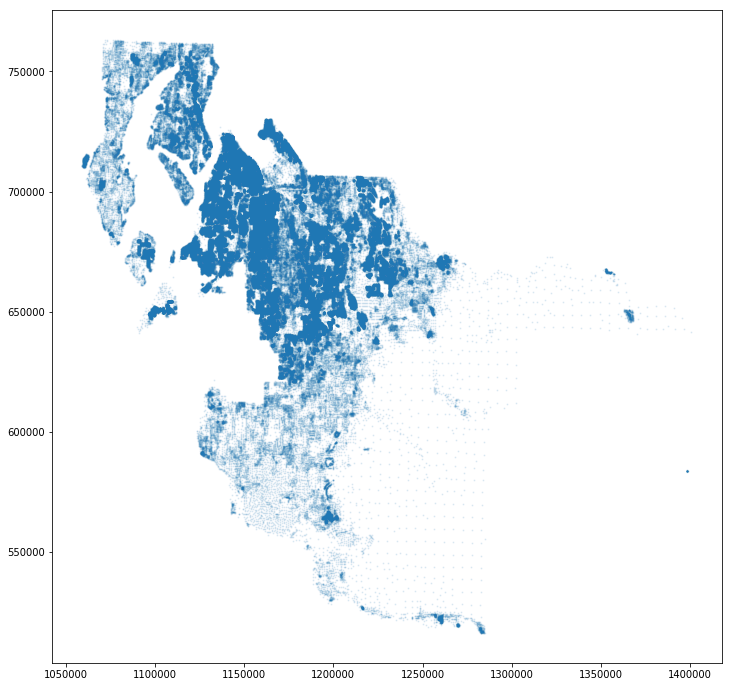

In [13]:
plt.figure(figsize = (12,12))
plt.scatter(df["X_Coordinate"], df["Y_Coordinate"], alpha = 0.1, s = 1)

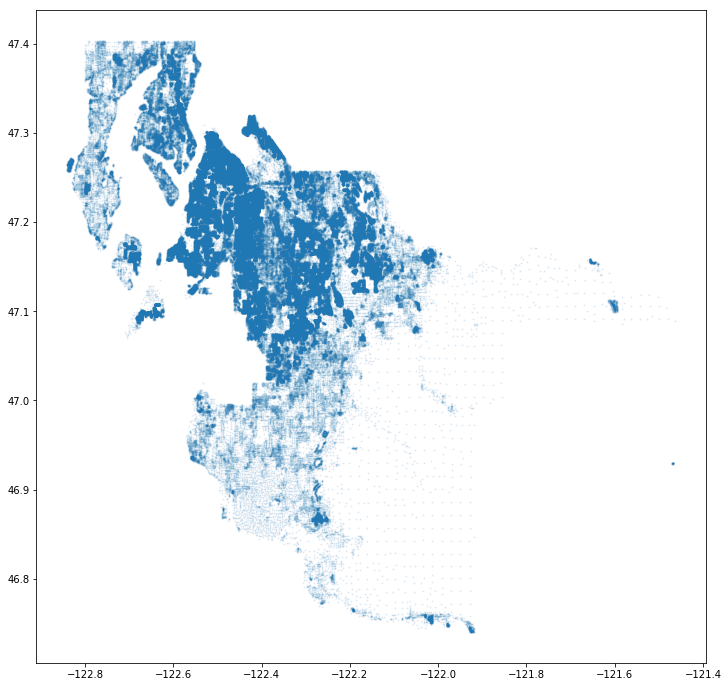

In [14]:
plt.figure(figsize = (12,12))
plt.scatter(df["Longitude"], df["Latitude"], alpha = 0.1, s = 1)

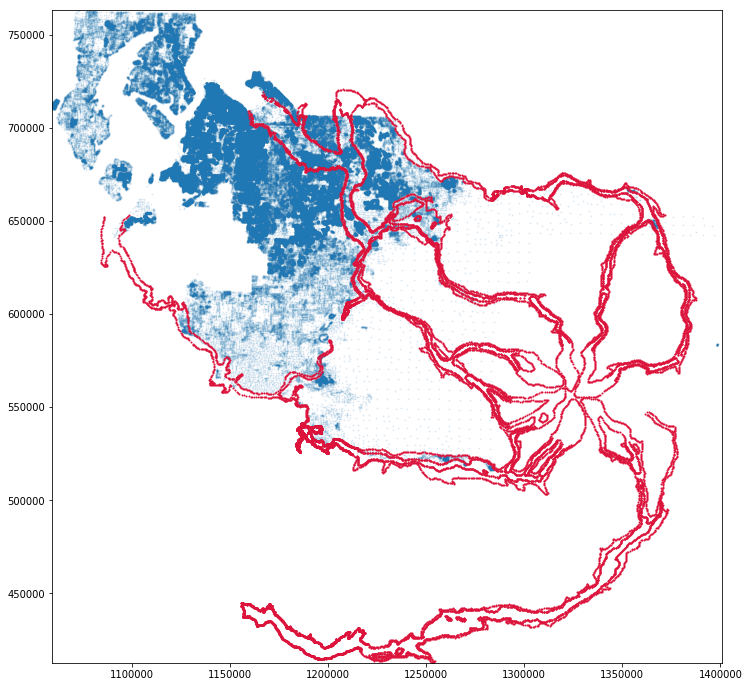

In [15]:
plt.figure(figsize = (12,12))
plt.scatter(df["X_Coordinate"], df["Y_Coordinate"], alpha = 0.1, s = 1)
shp = hazard
for poly in range(len(list(shp))):
    x = []
    y = []
    for i in shp[poly].vertices:
        x.append(i[0])
        y.append(i[1])

    plt.scatter(x, y, c = "crimson", s = 1)
    plt.xlim(df["X_Coordinate"].min(), df["X_Coordinate"].max())
    plt.ylim(shp.header['BBOX Ymin'], df["Y_Coordinate"].max())

In [16]:
# Isolate just the Latitude and longitude coordinates 
# and export to separate .csv for use in GIS reader.

df[["Longitude", "Latitude"]].to_csv("../data/lat_long.csv")

In [17]:
def contains(x, y, shp_file = hazard):

    for j in range(len(list(shp_file))):
        if shp_file[j].contains_point((x, y)):
            return True

    return False

In [18]:
contains(1325000, 530000)

True

In [20]:
df["at_risk"] = False

In [37]:
# Iterate through every coordinate and and check to see if it is
# in the path of the lahar flows by checking if it is contained
# within the polygons from the shapefile. 

# Will take a while to run on the full dataset.

n_rows = len(df)
checkpoint = 1000

# estimate based on roughly 27 seconds for 1000 rows
print(f"Estimated {round(((n_rows / 1000) * 27) / 60, 2)} minutes for {n_rows} rows.")

then = time.time()
last = then

times = []

for i in range(n_rows):
 
    df["at_risk"][i] = contains(df["X_Coordinate"][i], df["Y_Coordinate"][i])
    
    if i % checkpoint == 0 and i != 0:
        
        current = time.time() - last
        times.append(current)
        
        print(i, f"rows completed in {round(current, 2)} seconds, estimated",
              round(((n_rows - i) / checkpoint * current) / 60, 2),
              "minutes remaining")
        
        last = time.time()
        
print(f"\nCompleted {n_rows} rows in {round(((time.time() - then) / 60), 2)} minutes")

Estimated 147.29 minutes for 327319 rows.
1000 rows completed in 27.49 seconds, estimated 149.48 minutes remaining
2000 rows completed in 27.27 seconds, estimated 147.85 minutes remaining
3000 rows completed in 27.07 seconds, estimated 146.33 minutes remaining
4000 rows completed in 27.1 seconds, estimated 146.01 minutes remaining
5000 rows completed in 27.13 seconds, estimated 145.76 minutes remaining
6000 rows completed in 27.25 seconds, estimated 145.92 minutes remaining
7000 rows completed in 27.2 seconds, estimated 145.21 minutes remaining
8000 rows completed in 27.09 seconds, estimated 144.16 minutes remaining
9000 rows completed in 27.09 seconds, estimated 143.7 minutes remaining
10000 rows completed in 27.13 seconds, estimated 143.47 minutes remaining
11000 rows completed in 27.03 seconds, estimated 142.52 minutes remaining
12000 rows completed in 27.14 seconds, estimated 142.64 minutes remaining
13000 rows completed in 27.36 seconds, estimated 143.33 minutes remaining
14000 ro

112000 rows completed in 28.18 seconds, estimated 101.12 minutes remaining
113000 rows completed in 27.6 seconds, estimated 98.6 minutes remaining
114000 rows completed in 26.93 seconds, estimated 95.73 minutes remaining
115000 rows completed in 27.01 seconds, estimated 95.56 minutes remaining
116000 rows completed in 27.22 seconds, estimated 95.87 minutes remaining
117000 rows completed in 24.95 seconds, estimated 87.47 minutes remaining
118000 rows completed in 26.78 seconds, estimated 93.43 minutes remaining
119000 rows completed in 27.44 seconds, estimated 95.26 minutes remaining
120000 rows completed in 28.78 seconds, estimated 99.44 minutes remaining
121000 rows completed in 29.76 seconds, estimated 102.33 minutes remaining
122000 rows completed in 24.52 seconds, estimated 83.9 minutes remaining
123000 rows completed in 29.47 seconds, estimated 100.36 minutes remaining
124000 rows completed in 27.67 seconds, estimated 93.78 minutes remaining
125000 rows completed in 28.76 seconds

224000 rows completed in 27.56 seconds, estimated 47.46 minutes remaining
225000 rows completed in 26.26 seconds, estimated 44.79 minutes remaining
226000 rows completed in 28.21 seconds, estimated 47.63 minutes remaining
227000 rows completed in 25.69 seconds, estimated 42.96 minutes remaining
228000 rows completed in 29.6 seconds, estimated 49.0 minutes remaining
229000 rows completed in 28.28 seconds, estimated 46.35 minutes remaining
230000 rows completed in 28.15 seconds, estimated 45.66 minutes remaining
231000 rows completed in 25.62 seconds, estimated 41.12 minutes remaining
232000 rows completed in 27.37 seconds, estimated 43.49 minutes remaining
233000 rows completed in 28.24 seconds, estimated 44.4 minutes remaining
234000 rows completed in 29.52 seconds, estimated 45.91 minutes remaining
235000 rows completed in 27.44 seconds, estimated 42.22 minutes remaining
236000 rows completed in 29.09 seconds, estimated 44.28 minutes remaining
237000 rows completed in 29.56 seconds, e

In [39]:
df["at_risk"].value_counts()

False    327319
Name: at_risk, dtype: int64